# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#URL

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [4]:
# empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Hithadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0b173661708166ff355f5ef5861b13ca&q=hithadhoo
Processing Record 2 | Port Elizabeth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0b173661708166ff355f5ef5861b13ca&q=port elizabeth
Processing Record 3 | Znamenskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0b173661708166ff355f5ef5861b13ca&q=znamenskoye
Processing Record 4 | Kavaratti
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0b173661708166ff355f5ef5861b13ca&q=kavaratti
Processing Record 5 | Kalavad
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0b173661708166ff355f5ef5861b13ca&q=kalavad
Processing Record 6 | Butaritari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0b173661708166ff355f5ef5861b13ca&q=butaritari
Processing Record 7 | Estelle
http://api.openweathermap.org/d

City not found. Skipping...
Processing Record 56 | Namibe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0b173661708166ff355f5ef5861b13ca&q=namibe
Processing Record 57 | Pidvynohradiv
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0b173661708166ff355f5ef5861b13ca&q=pidvynohradiv
Processing Record 58 | Kruisfontein
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0b173661708166ff355f5ef5861b13ca&q=kruisfontein
Processing Record 59 | Oranjemund
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0b173661708166ff355f5ef5861b13ca&q=oranjemund
Processing Record 60 | Tiksi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0b173661708166ff355f5ef5861b13ca&q=tiksi
Processing Record 61 | Coquimbo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0b173661708166ff355f5ef5861b13ca&q=coquimbo
Processing Record 62 | Palmer
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPI

Processing Record 112 | Sibu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0b173661708166ff355f5ef5861b13ca&q=sibu
Processing Record 113 | Ordzhonikidze
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0b173661708166ff355f5ef5861b13ca&q=ordzhonikidze
Processing Record 114 | Opuwo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0b173661708166ff355f5ef5861b13ca&q=opuwo
Processing Record 115 | Horsham
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0b173661708166ff355f5ef5861b13ca&q=horsham
Processing Record 116 | Rio Gallegos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0b173661708166ff355f5ef5861b13ca&q=rio gallegos
Processing Record 117 | Znamenka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0b173661708166ff355f5ef5861b13ca&q=znamenka
Processing Record 118 | Faanui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0b173661708166ff355f5ef5861b1

Processing Record 168 | Ribeira Grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0b173661708166ff355f5ef5861b13ca&q=ribeira grande
City not found. Skipping...
Processing Record 169 | Jizan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0b173661708166ff355f5ef5861b13ca&q=jizan
Processing Record 170 | Nanfeng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0b173661708166ff355f5ef5861b13ca&q=nanfeng
City not found. Skipping...
Processing Record 171 | Hilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0b173661708166ff355f5ef5861b13ca&q=hilo
Processing Record 172 | Puerto Ayora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0b173661708166ff355f5ef5861b13ca&q=puerto ayora
Processing Record 173 | Taos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0b173661708166ff355f5ef5861b13ca&q=taos
Processing Record 174 | Carutapera
http://api.openweathermap.org/data/2.5/weat

Processing Record 223 | Storsteinnes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0b173661708166ff355f5ef5861b13ca&q=storsteinnes
Processing Record 224 | Sao Geraldo do Araguaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0b173661708166ff355f5ef5861b13ca&q=sao geraldo do araguaia
Processing Record 225 | Hualmay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0b173661708166ff355f5ef5861b13ca&q=hualmay
Processing Record 226 | Caravelas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0b173661708166ff355f5ef5861b13ca&q=caravelas
Processing Record 227 | Huarmey
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0b173661708166ff355f5ef5861b13ca&q=huarmey
Processing Record 228 | Finschhafen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0b173661708166ff355f5ef5861b13ca&q=finschhafen
Processing Record 229 | Fare
http://api.openweathermap.org/data/2.5/weather?units=Imperi

Processing Record 279 | Highland Springs
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0b173661708166ff355f5ef5861b13ca&q=highland springs
City not found. Skipping...
Processing Record 280 | Rio Grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0b173661708166ff355f5ef5861b13ca&q=rio grande
Processing Record 281 | Port Hedland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0b173661708166ff355f5ef5861b13ca&q=port hedland
Processing Record 282 | Cap Malheureux
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0b173661708166ff355f5ef5861b13ca&q=cap malheureux
Processing Record 283 | Avera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0b173661708166ff355f5ef5861b13ca&q=avera
Processing Record 284 | Bassar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0b173661708166ff355f5ef5861b13ca&q=bassar
City not found. Skipping...
Processing Record 285 | Maiduguri
http://api

Processing Record 334 | Saint-Augustin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0b173661708166ff355f5ef5861b13ca&q=saint-augustin
Processing Record 335 | Nishihara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0b173661708166ff355f5ef5861b13ca&q=nishihara
Processing Record 336 | Puerto Baquerizo Moreno
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0b173661708166ff355f5ef5861b13ca&q=puerto baquerizo moreno
Processing Record 337 | Abha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0b173661708166ff355f5ef5861b13ca&q=abha
Processing Record 338 | Tahoua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0b173661708166ff355f5ef5861b13ca&q=tahoua
Processing Record 339 | Biltine
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0b173661708166ff355f5ef5861b13ca&q=biltine
Processing Record 340 | Husavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=

City not found. Skipping...
Processing Record 389 | Kahului
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0b173661708166ff355f5ef5861b13ca&q=kahului
Processing Record 390 | George
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0b173661708166ff355f5ef5861b13ca&q=george
Processing Record 391 | Geraldton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0b173661708166ff355f5ef5861b13ca&q=geraldton
Processing Record 392 | Troitsko-Pechorsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0b173661708166ff355f5ef5861b13ca&q=troitsko-pechorsk
Processing Record 393 | Vostok
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0b173661708166ff355f5ef5861b13ca&q=vostok
City not found. Skipping...
Processing Record 394 | Ferme-Neuve
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0b173661708166ff355f5ef5861b13ca&q=ferme-neuve
Processing Record 395 | Ruidoso
http://api.openweathermap.

Processing Record 444 | Yokadouma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0b173661708166ff355f5ef5861b13ca&q=yokadouma
Processing Record 445 | Blagnac
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0b173661708166ff355f5ef5861b13ca&q=blagnac
Processing Record 446 | Duluth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0b173661708166ff355f5ef5861b13ca&q=duluth
City not found. Skipping...
Processing Record 447 | Encheng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0b173661708166ff355f5ef5861b13ca&q=encheng
Processing Record 448 | Bayan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0b173661708166ff355f5ef5861b13ca&q=bayan
Processing Record 449 | Biak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0b173661708166ff355f5ef5861b13ca&q=biak
Processing Record 450 | Meulaboh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0b173661708166ff355f5

Processing Record 500 | San Vicente
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0b173661708166ff355f5ef5861b13ca&q=san vicente
Processing Record 501 | Port Keats
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0b173661708166ff355f5ef5861b13ca&q=port keats
Processing Record 502 | Pionki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0b173661708166ff355f5ef5861b13ca&q=pionki
City not found. Skipping...
Processing Record 503 | Kenai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0b173661708166ff355f5ef5861b13ca&q=kenai
Processing Record 504 | Kuusamo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0b173661708166ff355f5ef5861b13ca&q=kuusamo
Processing Record 505 | Bayangol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0b173661708166ff355f5ef5861b13ca&q=bayangol
Processing Record 506 | Cam Ranh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0b1

In [5]:
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          544
Cloudiness    544
Country       544
Date          544
Humidity      544
Lat           544
Lng           544
Max Temp      544
Wind Speed    544
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Save data frame to CSV
weather_data.to_csv('output_data/cities.csv')

# Display data frame head 
weather_data.head()


FileNotFoundError: [Errno 2] No such file or directory: 'output_data/cities.csv'

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

FileNotFoundError: [Errno 2] No such file or directory: 'Output_Plots/Max_Temp_vs_Latitude.png'

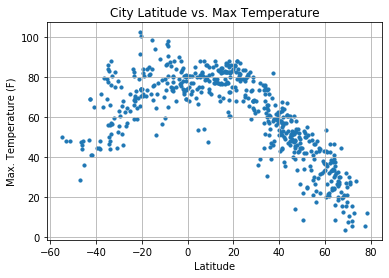

In [8]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

FileNotFoundError: [Errno 2] No such file or directory: 'Output_Plots/Humidity_vs_Latitude.png'

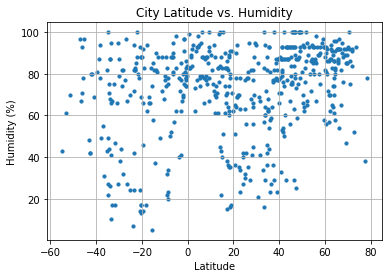

In [9]:

# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Humidity_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

FileNotFoundError: [Errno 2] No such file or directory: 'Output_Plots/Cloudiness_vs_Latitude.png'

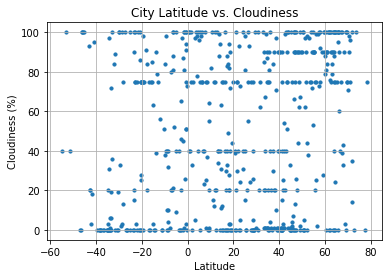

In [10]:

# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

FileNotFoundError: [Errno 2] No such file or directory: 'Output_Plots/Wind_Speed_vs_Latitude.png'

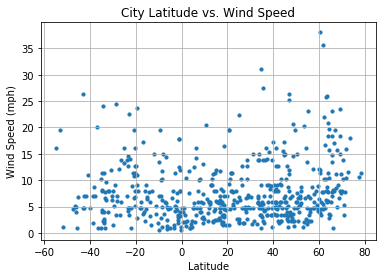

In [11]:

# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()